In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np 
import pandas as pd

In [27]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [28]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


- DecisionTreeClassifier(criterion="entropy",)
- train_test_split
- LabelEncoder()
- plot_tree()

In [29]:
my_data.shape

(200, 6)

In [30]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [31]:
my_data['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

# Exercise 
Build multi-class model for decision tree and visualize trained dataset

In [32]:
#Bağımlı ve bağımsız değişkenleri belirleme
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = my_data['Drug']

In [33]:
# Kategorik değişkenleri sayısal değerlere dönüştürmek için LabelEncoder kullanma
label_columns = ['Sex', 'BP', 'Cholesterol']
label_encoder = LabelEncoder()

for column in label_columns:
    X[column] = label_encoder.fit_transform(X[column])
X

C:\Users\Asus\AppData\Local\Temp\ipykernel_30604\3107416129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\Asus\AppData\Local\Temp\ipykernel_30604\3107416129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\Asus\AppData\Local\Temp\ipykernel_30604\3107416129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [34]:
# split yaptık
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

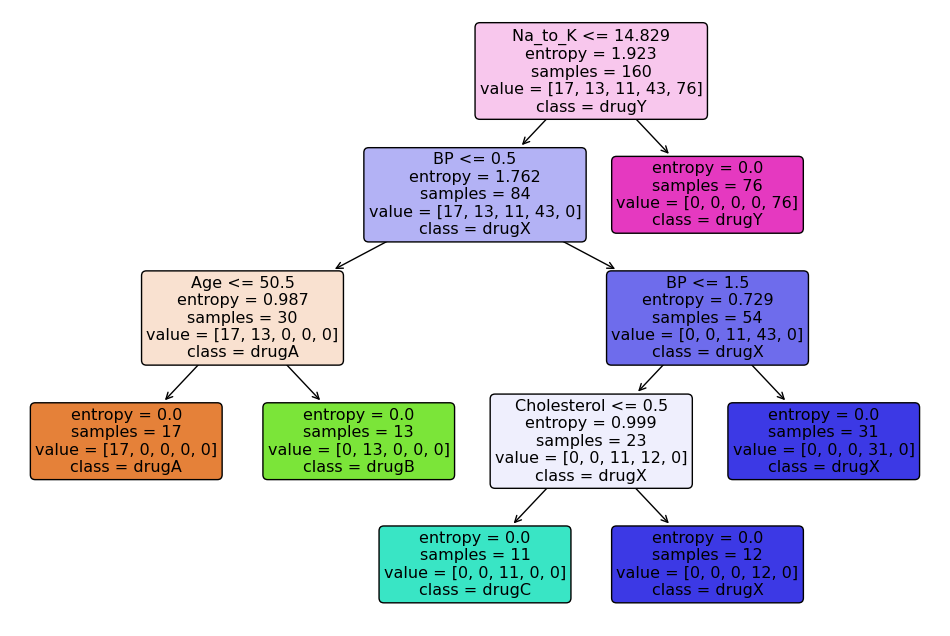

In [35]:
# Karar ağacı modelini oluşturdum
model = DecisionTreeClassifier(criterion="entropy")

# Modeli eğittim
model.fit(X_train, y_train)

# Karar ağacında görselleştirme
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.show()

In [36]:
# Tahmin yapma
y_pred = model.predict(X_test)
# Evaluation metrics değerleri  hesaplandı
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Modelin Doğruluk Değeri: {accuracy}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Modelin Doğruluk Değeri: 1.0
Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

